In [1]:
from policy1 import run_policy_1

exp_num = 1
queue_log = run_policy_1(exp_num, 100000)


-------------------Results for experiment 1:----------------
Average profit per customer: -67992.77403615232
Fraction of customers waiting over 30s: 0.9726616043122513
Average length of queue 1: 5.928461127925028
Average length of queue 2: 68562.19832180746
Average length of queue 3: 24709.878254143372



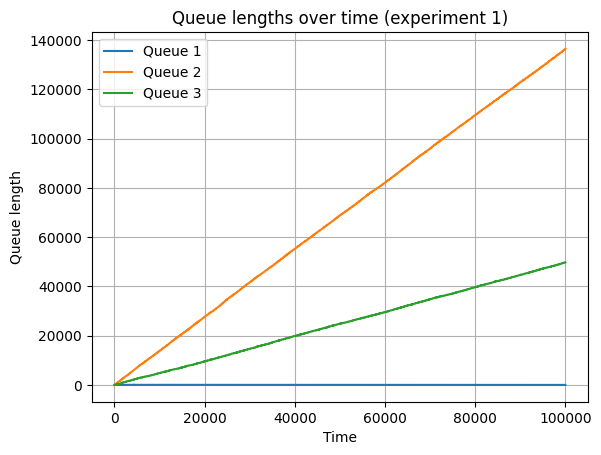

In [2]:
import matplotlib.pyplot as plt

# queue_log is a list of (time, [q1_len, q2_len, q3_len])
times = [t for (t, _) in queue_log]
q1 = [q[0] for (_, q) in queue_log]
q2 = [q[1] for (_, q) in queue_log]
q3 = [q[2] for (_, q) in queue_log]

plt.plot(times, q1, label='Queue 1')
plt.plot(times, q2, label='Queue 2')
plt.plot(times, q3, label='Queue 3')

plt.xlabel('Time')
plt.ylabel('Queue length')
plt.title(f'Queue lengths over time (experiment {exp_num})')
plt.legend()
plt.grid(True)
plt.show()
